In [1]:
#DNN Work

In [2]:
#======================== IMPORT PACKAGES ===========================

import numpy as np
import matplotlib.pyplot as plt 
from tkinter.filedialog import askopenfilename
import cv2
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
from skimage.feature import greycomatrix, greycoprops

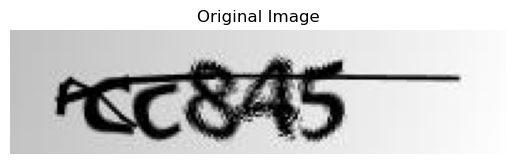

In [3]:
#====================== 1.READ A INPUT IMAGE =========================

filename = askopenfilename()
img = mpimg.imread(filename)
plt.imshow(img)
plt.title('Original Image')
plt.axis ('off')
plt.show()


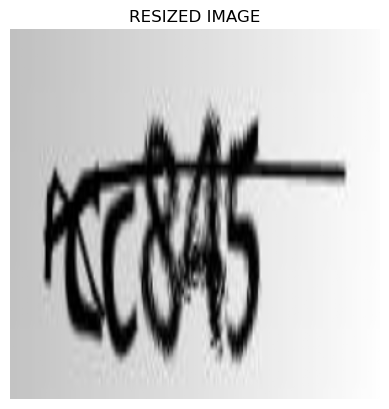

In [4]:
#============================ 2.IMAGE PREPROCESSING ====================

#==== RESIZE IMAGE ====

resized_image = cv2.resize(img,(300,300))
img_resize_orig = cv2.resize(img,((50, 50)))

fig = plt.figure()
plt.title('RESIZED IMAGE')
plt.imshow(resized_image)
plt.axis ('off')
plt.show()

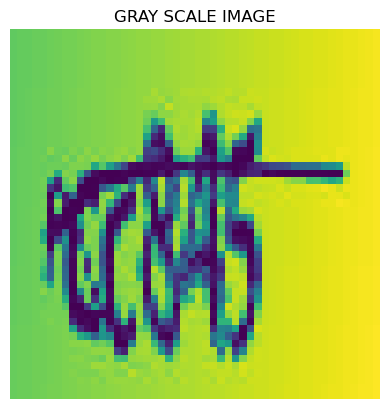

In [5]:
#==== GRAYSCALE IMAGE ====

try:            
    gray11 = cv2.cvtColor(img_resize_orig, cv2.COLOR_BGR2GRAY)
    
except:
    gray11 = img_resize_orig
   
fig = plt.figure()
plt.title('GRAY SCALE IMAGE')
plt.imshow(gray11)
plt.axis ('off')
plt.show()

In [6]:
#============================ 3.FEATURE EXTRACTION ====================

# === MEAN MEDIAN VARIANCE ===

mean_val = np.mean(gray11)
median_val = np.median(gray11)
var_val = np.var(gray11)
Test_features = [mean_val,median_val,var_val]


print()
print("----------------------------------------------")
print("FEATURE EXTRACTION --> MEAN, VARIANCE, MEDIAN ")
print("----------------------------------------------")
print()
print("1. Mean Value     =", mean_val)
print()
print("2. Median Value   =", median_val)
print()
print("3. Variance Value =", var_val)



----------------------------------------------
FEATURE EXTRACTION --> MEAN, VARIANCE, MEDIAN 
----------------------------------------------

1. Mean Value     = 0.7279098

2. Median Value   = 0.827451

3. Variance Value = 0.08706759


In [7]:
#============================ 5. IMAGE SPLITTING ===========================

import os 

from sklearn.model_selection import train_test_split

test_data = os.listdir('Dataset/Test/')
tr_data = os.listdir('Dataset/Train/')


dot1= []
labels1 = [] 
for img11 in test_data:
        # print(img)
        img_1 = mpimg.imread('Dataset/Test//' + "/" + img11)
        img_1 = cv2.resize(img_1,((50, 50)))


        try:            
            gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
            
        except:
            gray = img_1

        
        dot1.append(np.array(gray))
        labels1.append(1)


for img11 in tr_data:
        # print(img)
        img_1 = mpimg.imread('Dataset/Train//' + "/" + img11)
        img_1 = cv2.resize(img_1,((50, 50)))


        try:            
            gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
            
        except:
            gray = img_1

        
        dot1.append(np.array(gray))
        labels1.append(2)

x_train, x_test, y_train, y_test = train_test_split(dot1,labels1,test_size = 0.2, random_state = 101)

print()
print("-------------------------------------")
print("       IMAGE SPLITTING               ")
print("-------------------------------------")
print()


print("Total no of data        :",len(dot1))
print("Total no of test data   :",len(x_train))
print("Total no of train data  :",len(x_test))



-------------------------------------
       IMAGE SPLITTING               
-------------------------------------

Total no of data        : 1001
Total no of test data   : 800
Total no of train data  : 201


In [8]:
#=============================== CLASSIFICATION =================================

from keras.utils import to_categorical

y_train1=np.array(y_train)
y_test1=np.array(y_test)

train_Y_one_hot = to_categorical(y_train1)
test_Y_one_hot = to_categorical(y_test)


x_train2=np.zeros((len(x_train),50,50,3))
for i in range(0,len(x_train)):
        x_train2[i,:,:,:]=x_train2[i]

x_test2=np.zeros((len(x_test),50,50,3))
for i in range(0,len(x_test)):
        x_test2[i,:,:,:]=x_test2[i]


In [9]:
#compile the model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Flatten
model = Sequential() 

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])


In [10]:
model.add(Flatten(input_shape=(50,50,3)))
model.add(Dense(activation = "relu", input_dim = 1, units = 8, kernel_initializer = "uniform")) 
model.add(Dense(activation = "relu", units = 14,kernel_initializer = "uniform")) 
#model.add(Dense(activation = "relu", units = 20,kernel_initializer = "uniform")) 
model.add(Dense(activation = "sigmoid", units = 1,kernel_initializer = "uniform")) 
model.compile(optimizer = 'adam' , loss = 'mae',metrics=['accuracy'] )
#history1=model.fit(x_train2,train_Y_one_hot,batch_size=2,epochs=5,verbose=1)
history1 = model.fit(x_train2, train_Y_one_hot, batch_size=2, validation_data=(x_test2,test_Y_one_hot), epochs=50, verbose=1,steps_per_epoch=5)

loss= history1.history['loss']
loss=max(loss)

acc_dd=history1.history['accuracy']
acc_dd=max(acc_dd)
acc_dd=acc_dd*100

test_loss, test_acc = model.evaluate(x_test2, test_Y_one_hot)
#print(test_loss)
#print(test_acc)

Epoch 1/50
5/5 [==============================] - 2s 147ms/step - loss: 0.4998 - accuracy: 0.6667 - val_loss: 0.4996 - val_accuracy: 0.6667
Epoch 2/50
5/5 [==============================] - 0s 52ms/step - loss: 0.4994 - accuracy: 0.6667 - val_loss: 0.4992 - val_accuracy: 0.6667
Epoch 3/50
5/5 [==============================] - 0s 52ms/step - loss: 0.4990 - accuracy: 0.6667 - val_loss: 0.4987 - val_accuracy: 0.6667
Epoch 4/50
5/5 [==============================] - 0s 53ms/step - loss: 0.4986 - accuracy: 0.6667 - val_loss: 0.4983 - val_accuracy: 0.6667
Epoch 5/50
5/5 [==============================] - 0s 53ms/step - loss: 0.4982 - accuracy: 0.6667 - val_loss: 0.4979 - val_accuracy: 0.6667
Epoch 6/50
5/5 [==============================] - 0s 55ms/step - loss: 0.4978 - accuracy: 0.6667 - val_loss: 0.4975 - val_accuracy: 0.6667
Epoch 7/50
5/5 [==============================] - 0s 51ms/step - loss: 0.4973 - accuracy: 0.6667 - val_loss: 0.4971 - val_accuracy: 0.6667
Epoch 8/50
5/5 [==========

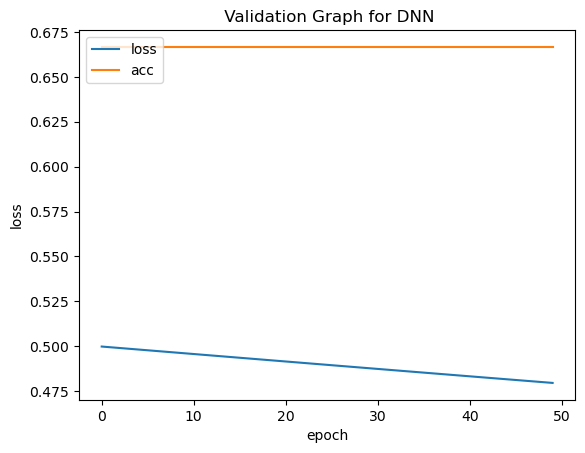

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['accuracy'])

plt.title(' Validation Graph for DNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc = 'upper left')
plt.show()

In [12]:

print("----------------------------------------------")
print("DEEP NEURAL NETWORK")
print("----------------------------------------------")
print()


print("1) Accuracy     =",acc_dd ,'%')
print()
print('2) Error rate  = ',loss,'%')


----------------------------------------------
DEEP NEURAL NETWORK
----------------------------------------------

1) Accuracy     = 66.66666865348816 %

2) Error rate  =  0.499833345413208 %


Validation Accuracy =  0.6666670441627502

Loss rate =  0.499833345413208

Validation Loss =  0.4995838701725006



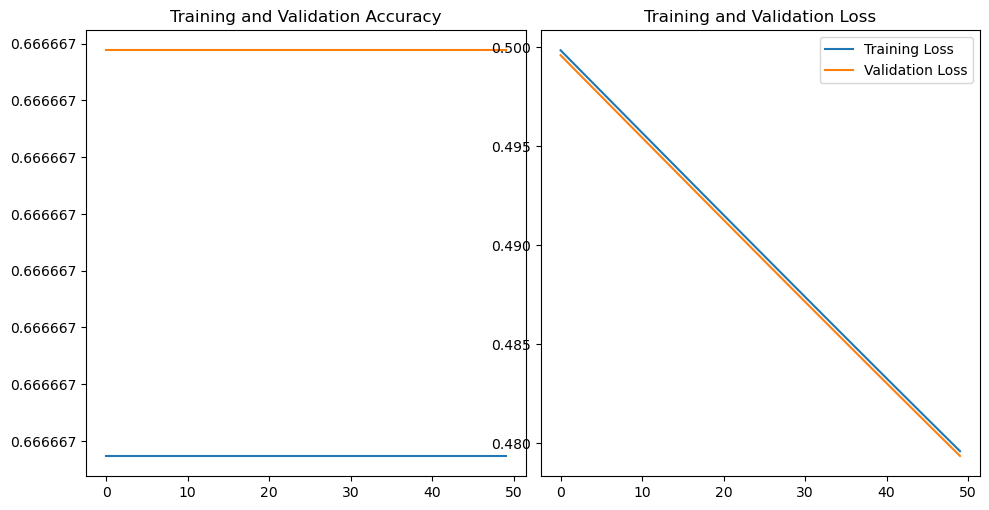

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Set the figure size
plt.figure(figsize=(10, 5))

# Get the accuracy and loss data
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']


valacc=max(val_acc)
print("Validation Accuracy = ", valacc)
print()
l1=max(loss)
print("Loss rate = ", l1)
print()
valoss=max(val_loss)
print("Validation Loss = ", valoss)
print()


# Plot the accuracy data
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.6f'))
plt.tight_layout()
plt.title('Training and Validation Accuracy')
#plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
# Display the plot
plt.show()

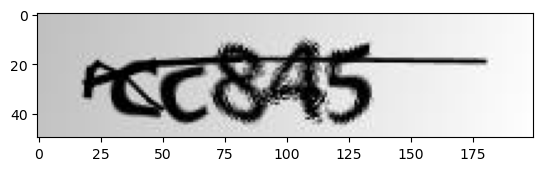

['']


In [15]:
import cv2
import pytesseract

tessdata_dir_config = '--tessdata-dir "C:\\Program Files\\Tesseract-OCR\\tessdata"'
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

# text recognition
import matplotlib.pyplot as plt

# read image

img = cv2.imread(filename)
plt.imshow(img)
plt.show()
# configurations
config = ('-l eng --oem 1 --psm 3')
# pytesseract path
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract.exe'
text = pytesseract.image_to_string(img, config=config)
# print results
text = text.split('\n')
print(text)
